# Introduction

Naive Bayes is a classification machine learning model.

Naive Bayes model works on the basis of Bayes theorem along with Naive assumption.

# Bayes Theorem

Bayes theorem finds the probability of occuring of an event given that another event has already occured.

Bayes theorem is matematically stated by the equation:

$ P(A|B) = P(A) P(B|A) / P(B) $, where A and B are the events and $ P(B) $ is not equal to 0.

Here we finding the probability of occuring of event A, given that event B has already occured.

# Naive Assumption

The feature (independent) variables should be independent of each other and individually influence the final output.

Naive assumption is mathematically written as:

When two events A and B are independent, $ P(A  and  B) = P(A) P(B) $

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
plt.rcParams['figure.figsize'] = [19, 8] 

In [86]:
import warnings
warnings.filterwarnings('ignore')

# Example - Weather condition influencing cricket playing

## Read the Data

In [87]:
cricket_df = pd.read_csv("../datasets/cricket.csv")

In [88]:
cricket_df.shape

(14, 5)

In [89]:
cricket_df.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY CRICKET
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [90]:
cricket_df['OUTLOOK'].sort_values().unique()

array(['Overcast', 'Rainy', 'Sunny'], dtype=object)

In [91]:
cricket_df['TEMPERATURE'].sort_values().unique()

array(['Cool', 'Hot', 'Mild'], dtype=object)

In [92]:
cricket_df['HUMIDITY'].sort_values().unique()

array(['High', 'Normal'], dtype=object)

In [93]:
cricket_df['WINDY'].sort_values().unique()

array([False,  True])

In [94]:
cricket_df['PLAY CRICKET'].sort_values().unique()

array(['No', 'Yes'], dtype=object)

### Frequency Table

In [95]:
pd.pivot_table(data=cricket_df, index='OUTLOOK', columns='PLAY CRICKET', aggfunc='count', margins=True, fill_value=0)

HUMIDITY         TEMPERATURE         WINDY        
PLAY CRICKET       No Yes All          No Yes All    No Yes All
OUTLOOK                                                        
Overcast            0   4   4           0   4   4     0   4   4
Rainy               3   2   5           3   2   5     3   2   5
Sunny               2   3   5           2   3   5     2   3   5
All                 5   9  14           5   9  14     5   9  14

In [96]:
pd.pivot_table(data=cricket_df, index='TEMPERATURE', columns='PLAY CRICKET', aggfunc='count', margins=True, fill_value=0)

HUMIDITY         OUTLOOK         WINDY        
PLAY CRICKET       No Yes All      No Yes All    No Yes All
TEMPERATURE                                                
Cool                1   3   4       1   3   4     1   3   4
Hot                 2   2   4       2   2   4     2   2   4
Mild                2   4   6       2   4   6     2   4   6
All                 5   9  14       5   9  14     5   9  14

In [97]:
pd.pivot_table(data=cricket_df, index='HUMIDITY', columns='PLAY CRICKET', aggfunc='count', margins=True, fill_value=0)

OUTLOOK         TEMPERATURE         WINDY        
PLAY CRICKET      No Yes All          No Yes All    No Yes All
HUMIDITY                                                      
High               4   3   7           4   3   7     4   3   7
Normal             1   6   7           1   6   7     1   6   7
All                5   9  14           5   9  14     5   9  14

In [98]:
pd.pivot_table(data=cricket_df, index='WINDY', columns='PLAY CRICKET', aggfunc='count', margins=True, fill_value=0)

HUMIDITY         OUTLOOK         TEMPERATURE        
PLAY CRICKET       No Yes All      No Yes All          No Yes All
WINDY                                                            
False               2   6   8       2   6   8           2   6   8
True                3   3   6       3   3   6           3   3   6
All                 5   9  14       5   9  14           5   9  14

In [99]:
pd.pivot_table(data=cricket_df, index='PLAY CRICKET', columns='PLAY CRICKET', aggfunc='count', margins=True, fill_value=0)

HUMIDITY         OUTLOOK         TEMPERATURE         WINDY      \
PLAY CRICKET       No Yes All      No Yes All          No Yes All    No Yes   
PLAY CRICKET                                                                  
No                  5   0   5       5   0   5           5   0   5     5   0   
Yes                 0   9   9       0   9   9           0   9   9     0   9   
All                 5   9  14       5   9  14           5   9  14     5   9   

                  
PLAY CRICKET All  
PLAY CRICKET      
No             5  
Yes            9  
All           14

### Prediction Data

In [100]:
given_day = ['Sunny', 'Hot', 'Normal', 'False']

### Calculate Proportional Probability

In [101]:
p_yes = (9/14) * (3/9) * (2/9) * (6/9) * (6/9)

p_yes

0.021164021164021163

In [102]:
p_no = (5/14) * (2/5) * (2/5) * (1/5) * (2/5)

p_no

0.004571428571428573

In [103]:
p_yes / (p_yes + p_no)

0.8223684210526315

In [104]:
p_no / (p_yes + p_no)

0.17763157894736847

# Types of Naive Bayes Model

# Case Study - Chance of Admission

## Read the Data

In [105]:
admission_df = pd.read_csv('..\datasets\Admission_Predict.csv')

In [106]:
admission_df.shape

(400, 8)

In [107]:
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [108]:
data_columns = {
    'Column': ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit'],
    'Description': ['GRE Scores', 'TOEFL Scores', 'University Rating (1 to 5)', 'Statement of Purpose (1 to 5)', 
                    'Letter of Recommendation Strength (1 to 5)', 'Undergraduate CGPA', 'Research Experience (0 or 1)',
                   'Chance of Admit']
}

pd.DataFrame(data_columns)

,Column,Description
0,GRE Score,GRE Scores
1,TOEFL Score,TOEFL Scores
2,University Rating,University Rating (1 to 5)
3,SOP,Statement of Purpose (1 to 5)
4,LOR,Letter of Recommendation Strength (1 to 5)
5,CGPA,Undergraduate CGPA
6,Research,Research Experience (0 or 1)
7,Chance of Admit,Chance of Admit


## Data type 

In [109]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.1 KB


## Check for Duplicate rows

In [110]:
admission_df.duplicated().sum()

0

## Data Visualization

### Data Distribution of feature varibles

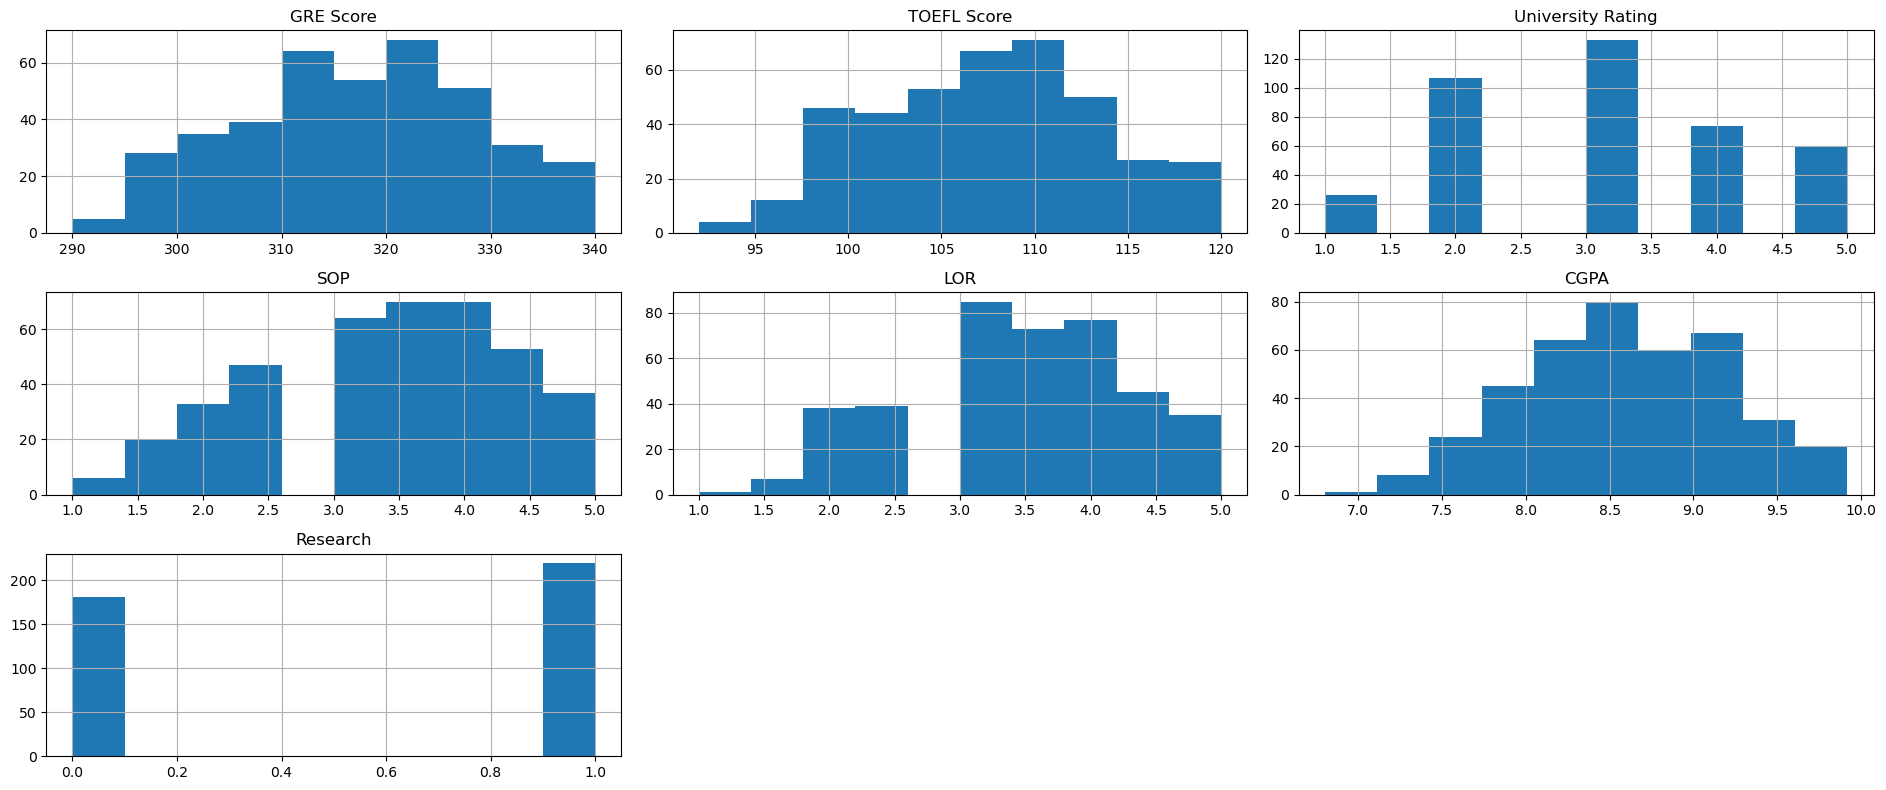

In [111]:
admission_df.select_dtypes(include=np.number).drop('Chance of Admit', axis=1).hist()

plt.tight_layout()

plt.show()

### Calculation of Skweness

In [112]:
admission_df.select_dtypes(include=np.number).drop('Chance of Admit', axis=1).skew()

GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
dtype: float64

### Distribution of target variable

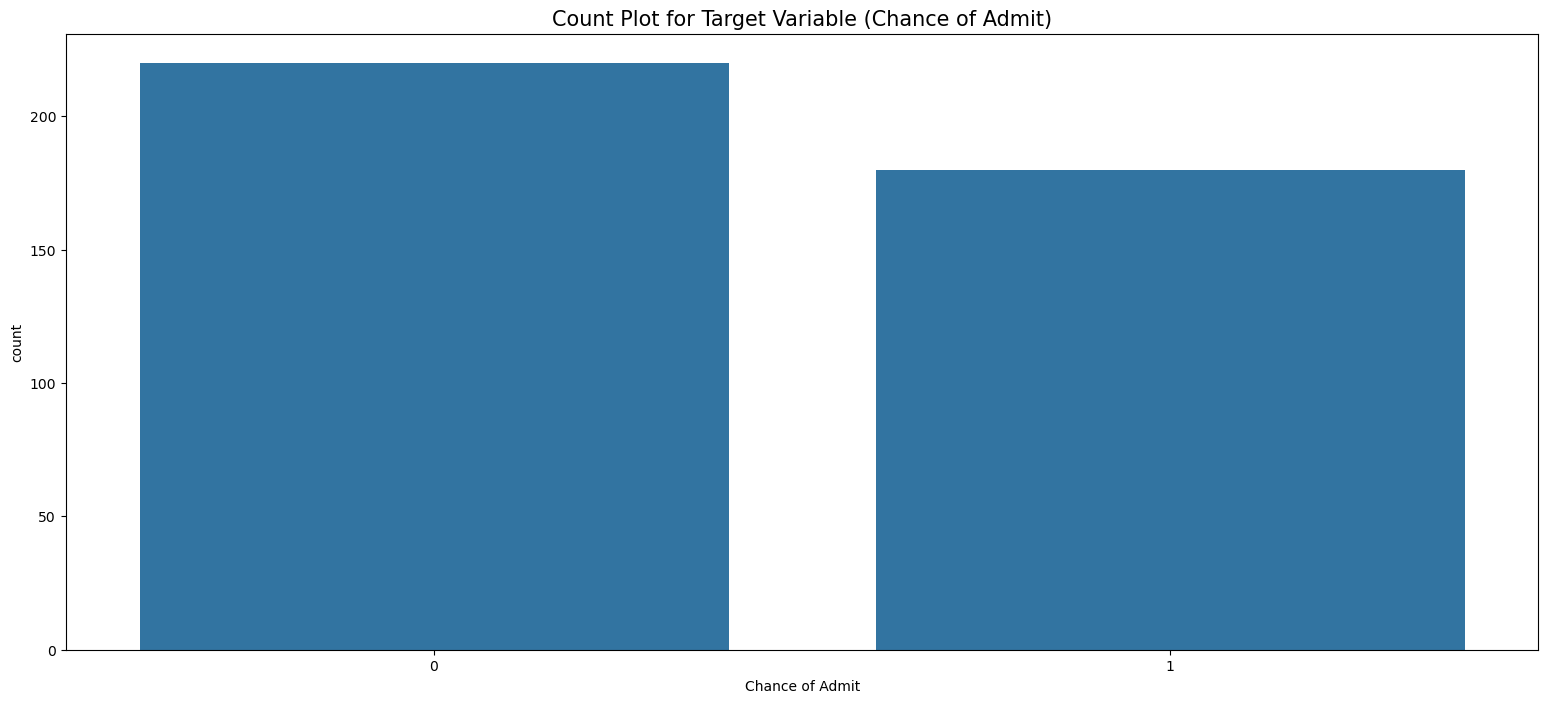

In [113]:
sns.countplot(data=admission_df, x='Chance of Admit')

plt.title('Count Plot for Target Variable (Chance of Admit)', fontsize = 15)

plt.show()

## Outlier

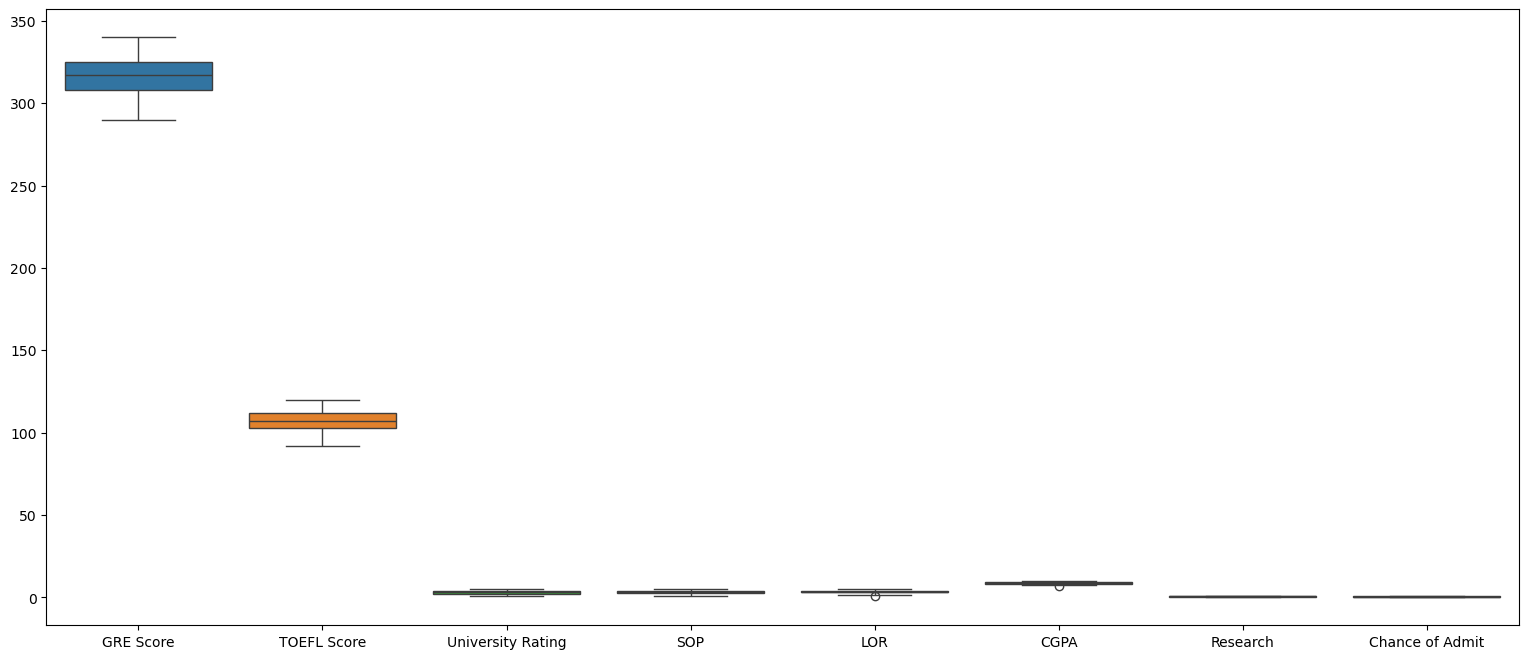

In [114]:
sns.boxplot(admission_df)

plt.show()

## Divide the data frame into independent and dependent variables

In [115]:
X = admission_df.loc[:, :'Research'].values

y = admission_df.loc[:, 'Chance of Admit'].values

In [116]:
X.shape, y.shape

((400, 7), (400,))

## Data Normalization

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()

In [119]:
X = scaler.fit_transform(X)

## Split the Data into train and test data

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Model Training

In [122]:
from sklearn.naive_bayes import GaussianNB

In [123]:
model = GaussianNB()

In [124]:
model.fit(X_train, y_train)

GaussianNB()

## Model Evaluation

In [125]:
model.score(X_train, y_train)

0.871875

## Model Testing

In [126]:
model.score(X_test, y_test)

0.85

### Draw Confusion Matrix

In [127]:
y_predict = model.predict(X_test)

In [128]:
y_predict

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [135]:
pd.DataFrame(model.predict_proba(X_test), columns=['Probability of 0', 'Probability of 1']).head()

,Probability of 0,Probability of 1
0,1.000000e+00,1.107062e-09
1,1.741469e-07,9.999998e-01
2,1.000000e+00,1.258355e-09
3,9.999998e-01,2.110934e-07
4,7.328844e-03,9.926712e-01


In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
cm = confusion_matrix(y_test, y_predict)

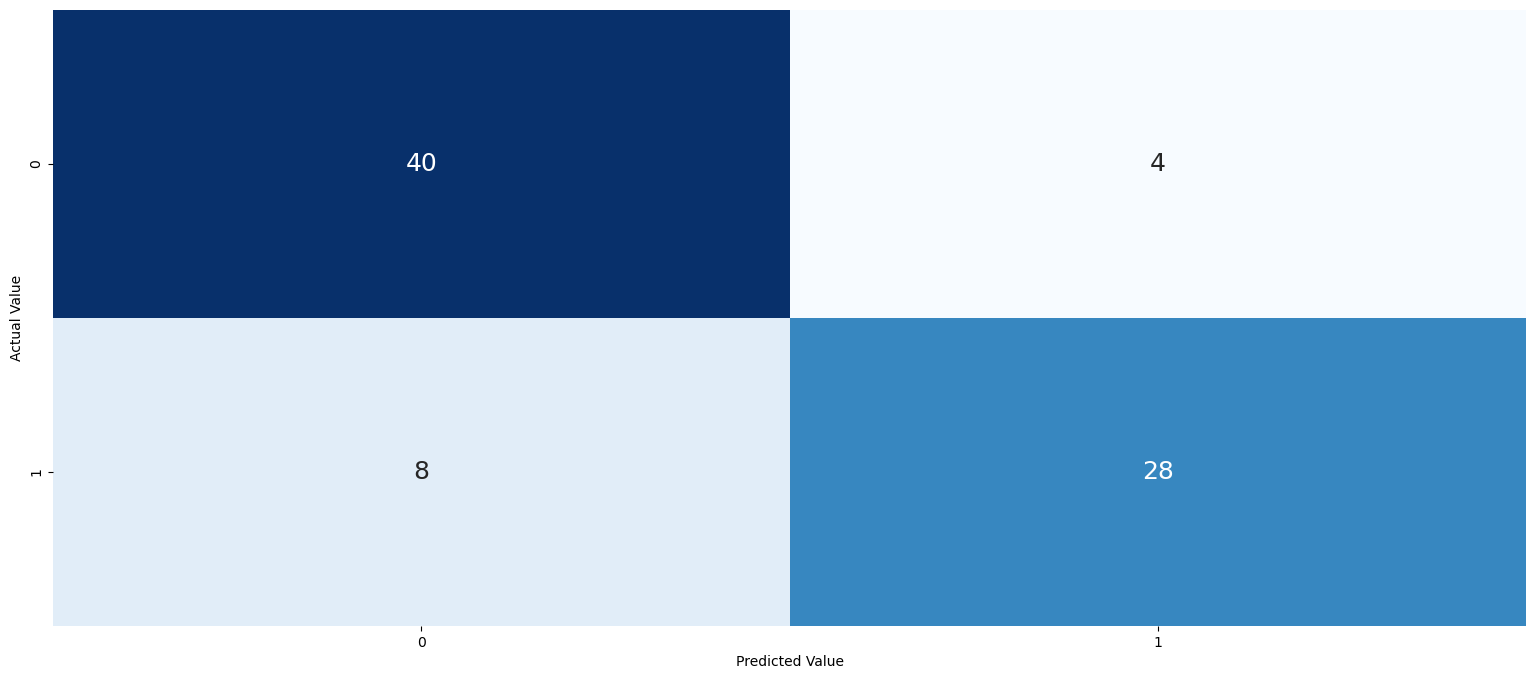

In [132]:
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, annot_kws={"fontsize":18})

plt.xlabel("Predicted Value")

plt.ylabel("Actual Value")

plt.show()

### Classification Report

In [133]:
from sklearn.metrics import classification_report

In [134]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        44
           1       0.88      0.78      0.82        36

    accuracy                           0.85        80
   macro avg       0.85      0.84      0.85        80
weighted avg       0.85      0.85      0.85        80

